In [53]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [54]:
iris=datasets.load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"]=iris.target
labels=iris.target_names
print(labels)
df.head(10)

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


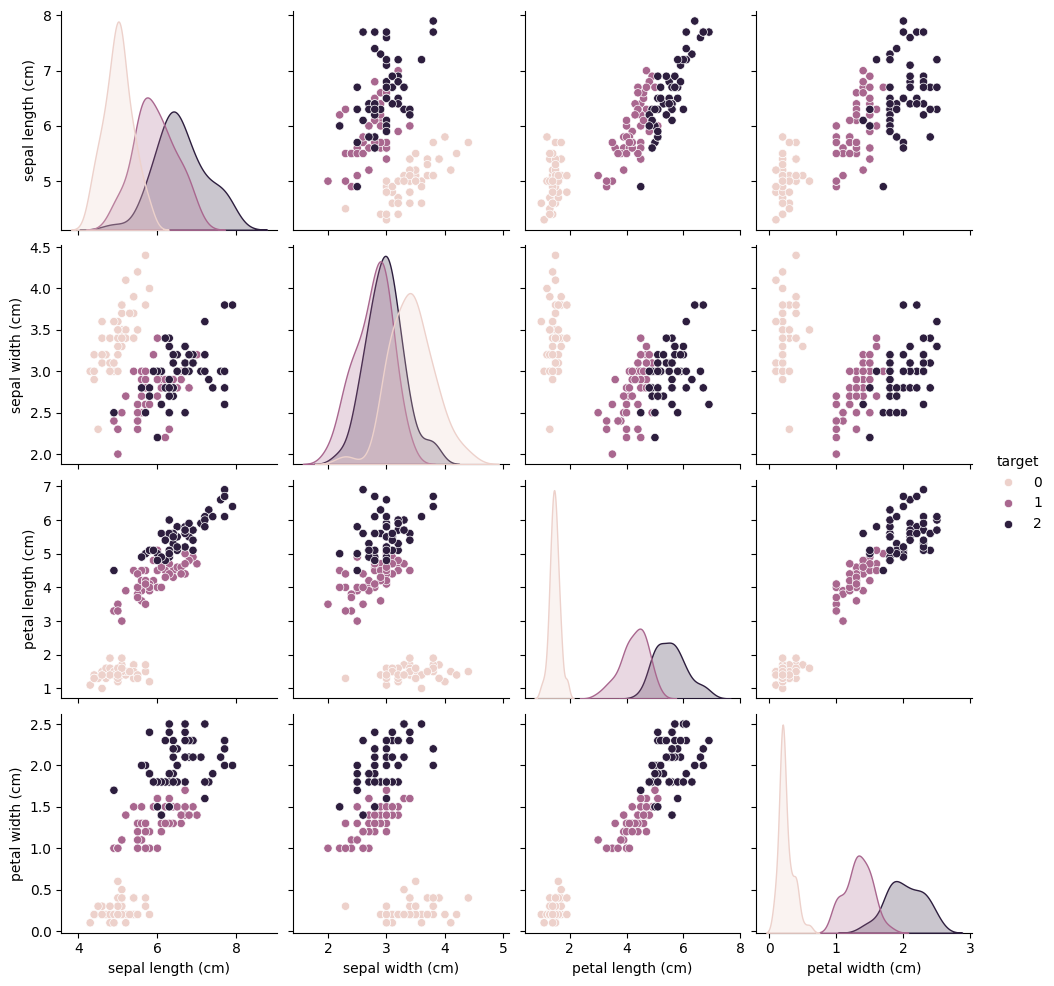

In [55]:
# sns.scatterplot(data=df,x="sepal length (cm)",y="petal length (cm)",hue="target")
sns.pairplot(df,hue="target")
plt.show()

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
cls=KNeighborsClassifier(n_neighbors=3)

x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='target'),df['target'],train_size=0.3,random_state=42)
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))




Accuracy: 0.9714285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.94      0.95        33
           2       0.94      0.97      0.95        32

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



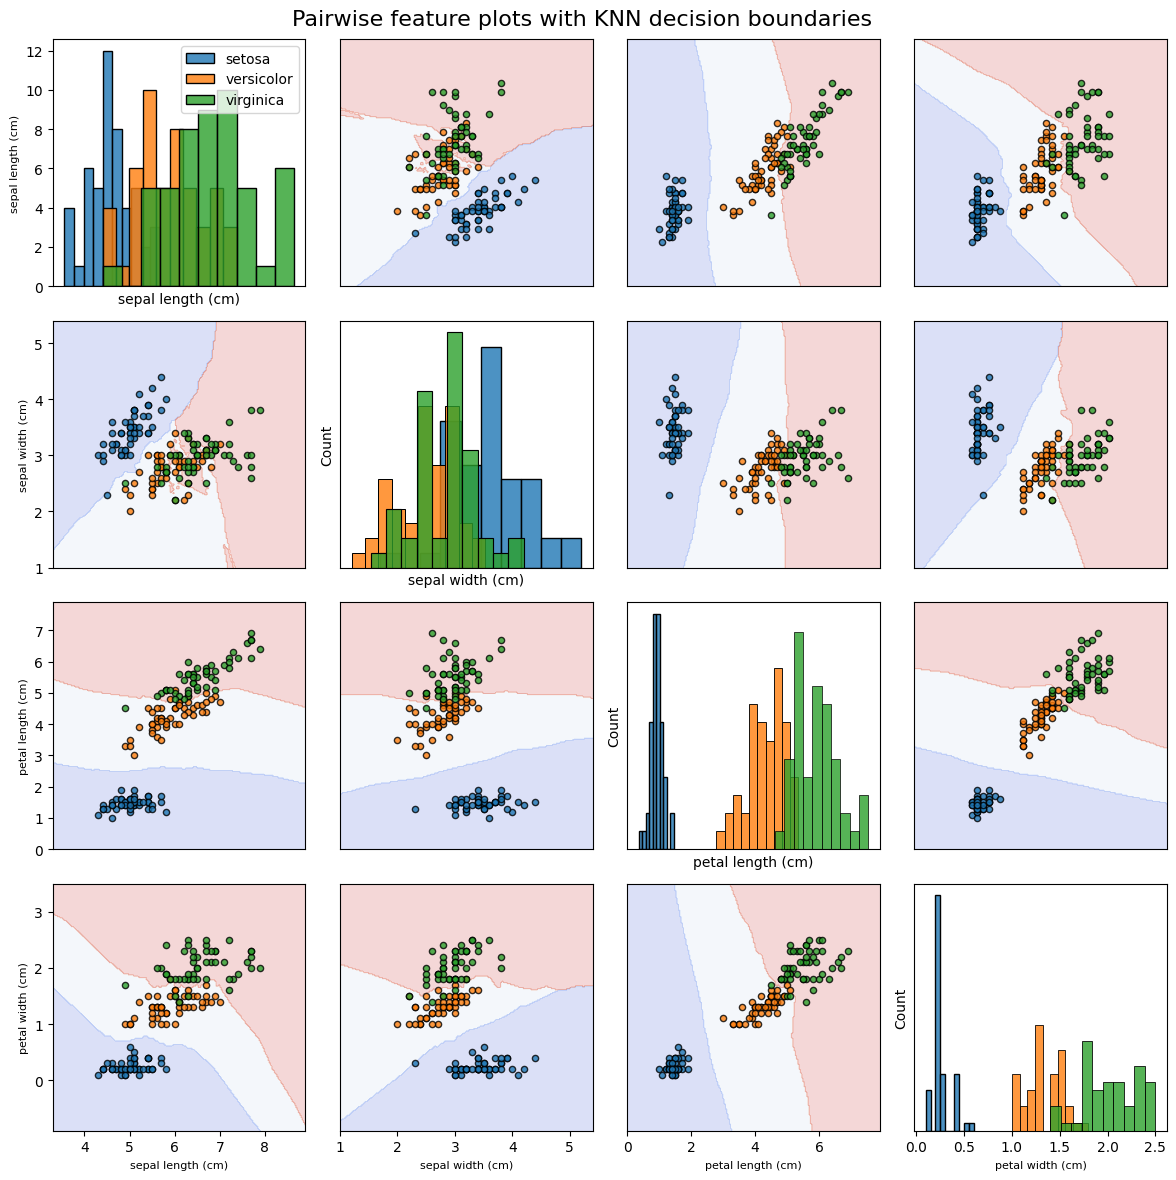

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd

# Load data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for seaborn
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Set KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Plot
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        if i == j:
            # Plot histograms on the diagonal
            for t in np.unique(y):
                sns.histplot(df[df['target'] == t].iloc[:, i], bins=10, ax=ax, label=target_names[t], alpha=0.8)
            if i == 0:
                ax.legend()
        else:
            # Use only the two features
            Xi = X[:, j]
            Xj = X[:, i]
            X_pair = np.stack((Xi, Xj), axis=1)

            # Fit KNN on this pair
            knn.fit(X_pair, y)

            # Create a meshgrid
            x_min, x_max = Xi.min() - 1, Xi.max() + 1
            y_min, y_max = Xj.min() - 1, Xj.max() + 1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                                 np.linspace(y_min, y_max, 200))
            grid = np.c_[xx.ravel(), yy.ravel()]
            Z = knn.predict(grid).reshape(xx.shape)

            # Plot decision boundary
            ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

            # Scatter plot of real points
            for t in np.unique(y):
                ax.scatter(X[y == t, j], X[y == t, i], label=target_names[t], alpha=0.8,edgecolors='k',s=20)

        if i == 3:
            ax.set_xlabel(feature_names[j], fontsize=8)
        else:
            ax.set_xticks([])
        if j == 0:
            ax.set_ylabel(feature_names[i], fontsize=8)
        else:
            ax.set_yticks([])

plt.suptitle("Pairwise feature plots with KNN decision boundaries", fontsize=16)
plt.tight_layout()
plt.show()


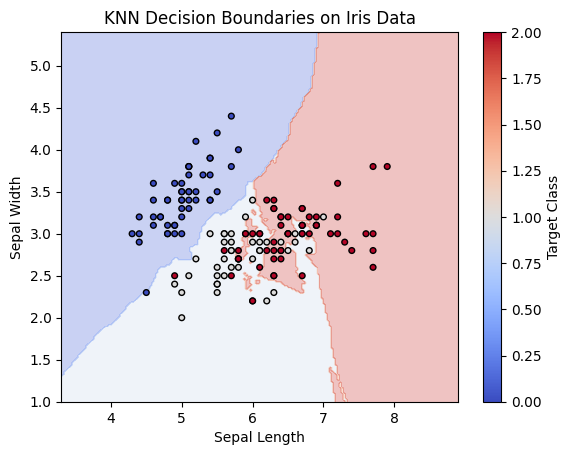

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Taking only sepal length and sepal width for simplicity
y = iris.target
target_names = iris.target_names

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create meshgrid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict class for each point in the mesh
Z = knn.predict(grid).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot original data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=17)

# Add color bar
plt.colorbar(scatter, label='Target Class')

# Labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Decision Boundaries on Iris Data')

plt.show()



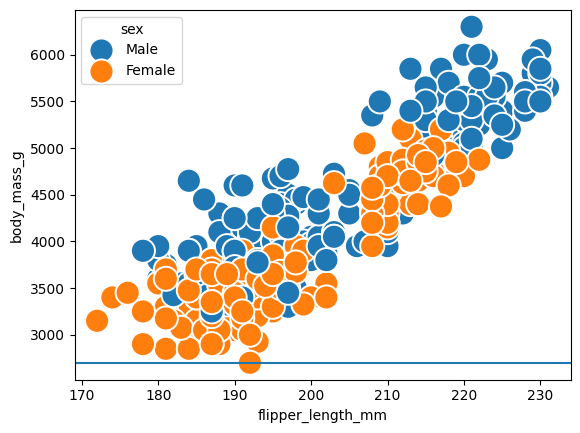